In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import skimage

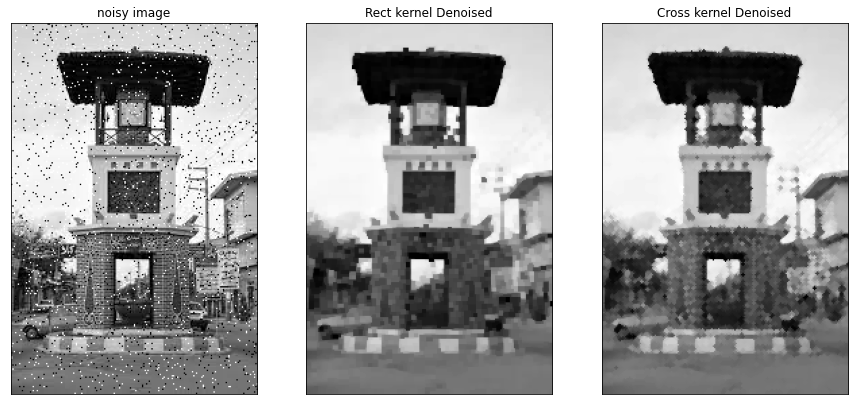

In [5]:
img = cv2.imread(filename="amirkola_city.jpg", flags=cv2.IMREAD_GRAYSCALE)
# Apply salt & pepper noise with  amount=0.05
noisy_img = skimage.util.random_noise(img, mode='s&p', amount=0.05)

# kernel
RECT_kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3,3))
CROSS_kernel = cv2.getStructuringElement(shape=cv2.MORPH_CROSS, ksize=(3,3))

# Denoising with RECT_kernel
Rect_imgO =  cv2.morphologyEx(noisy_img, cv2.MORPH_OPEN, RECT_kernel)
Rect_imgDenoise = cv2.morphologyEx(Rect_imgO, cv2.MORPH_CLOSE, RECT_kernel)

# Denoising with CROSS_kernel
Cross_imgO =  cv2.morphologyEx(noisy_img, cv2.MORPH_OPEN, CROSS_kernel)
Cross_imgDenoise = cv2.morphologyEx(Cross_imgO, cv2.MORPH_CLOSE, CROSS_kernel)


fig, axes = plt.subplots(1,3, figsize=(15,8))
axes[0].imshow(noisy_img, cmap='gray')
axes[0].set_title("noisy image")

axes[1].imshow(Rect_imgDenoise, 'gray')
axes[1].set_title("Rect kernel Denoised")

axes[2].imshow(Cross_imgDenoise, 'gray')
axes[2].set_title("Cross kernel Denoised")

for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()